Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import os

C:\Users\Bhara\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Bhara\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Bhara\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv(r'Dataset\Loans.csv')

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [14]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

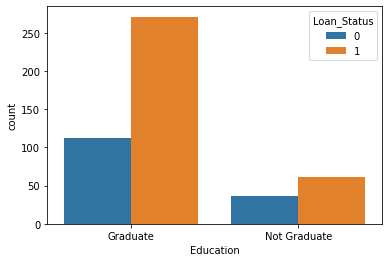

In [15]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

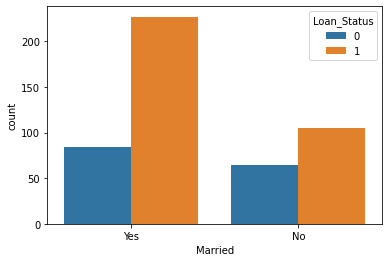

In [16]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [17]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},
                      'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                      'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [18]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [20]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [21]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

### Support Vector Machines

In [23]:
svm_clf = svm.SVC(kernel='linear')

In [24]:
#training the support Vector Macine model
svm_clf.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [25]:
# accuracy score on training data
X_train_prediction = svm_clf.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [26]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
svc_test_data_accuray = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ', svc_test_data_accuray)

Accuracy on test data :  0.8333333333333334


### Logistic Regression

In [27]:
# fitting logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

C:\Users\Bhara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [28]:
# accuracy score on training data
X_train_prediction = log_reg.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8009259259259259


In [29]:
# accuracy score on test data
X_test_prediction = log_reg.predict(X_test)
log_test_data_accuray = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ', log_test_data_accuray)

Accuracy on test data :  0.8333333333333334


### KNN Classifier

In [30]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier()

Model Evaluation

In [31]:
# accuracy score on training data
X_train_prediction = knn_clf.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7430555555555556


In [32]:
# accuracy score on test data
X_test_prediction = knn_clf.predict(X_test)
knn_test_data_accuray = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ', knn_test_data_accuray)

Accuracy on test data :  0.6666666666666666


### Decision Tree

In [33]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train,Y_train)

DecisionTreeClassifier()

Model Evaluation

In [34]:
# accuracy score on training data
X_train_prediction = DT_clf.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  1.0


In [35]:
# accuracy score on test data
X_test_prediction = DT_clf.predict(X_test)
DT_test_data_accuray = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ', DT_test_data_accuray)

Accuracy on test data :  0.7291666666666666


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [49]:
# accuracy score on training data
X_train_prediction = RF_clf.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  1.0


In [50]:
# accuracy score on test data
X_test_prediction = RF_clf.predict(X_test)
RF_test_data_accuray = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ', RF_test_data_accuray)

Accuracy on test data :  0.8333333333333334


Text(0.5, 1.0, 'Model Comparison on Test Accuracy')

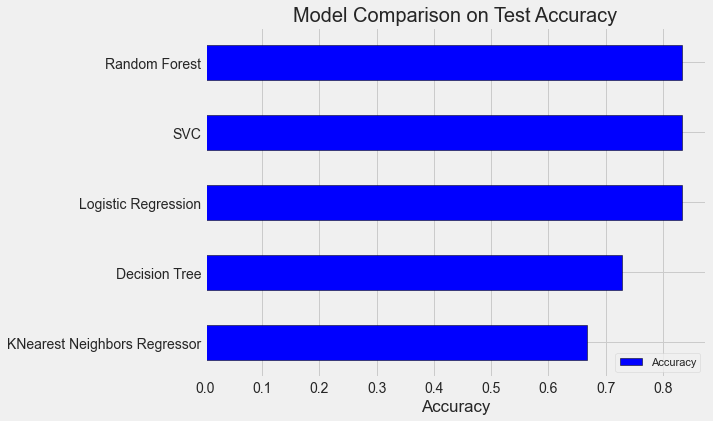

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
plt.rcParams['font.size'] = 10
sns.set(font_scale = 1)

plt.style.use('fivethirtyeight')
figsize(8, 6)

# DataFrame to hold the results
model_comparison = pd.DataFrame({'Model':['Decision Tree', 'Logistic Regression', 
                                          'SVC','KNearest Neighbors Regressor',
                                         'Random Forest'],
                                'Accuracy':[DT_test_data_accuray, log_test_data_accuray, 
                                            svc_test_data_accuray, knn_test_data_accuray,
                                           RF_test_data_accuray]})

# Horizontal bar chart of test MAE
model_comparison.sort_values('Accuracy', ascending = True).plot(x = 'Model', y = 'Accuracy', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# plot formatting
plt.ylabel('')
plt.yticks(size = 14)
plt.xlabel('Accuracy')
plt.xticks(size = 14)
plt.title('Model Comparison on Test Accuracy', size = 20)

In [56]:
scores = pd.DataFrame()
scores['Feature_names'] = X.columns
scores['Feature_importances'] = RF_clf.feature_importances_

scores.sort_values(by=['Feature_importances'], ascending=False)

,Feature_names,Feature_importances
9,Credit_History,0.250198
5,ApplicantIncome,0.214286
7,LoanAmount,0.195083
6,CoapplicantIncome,0.106087
8,Loan_Amount_Term,0.048758
10,Property_Area,0.048473
2,Dependents,0.046079
1,Married,0.025873
3,Education,0.024426
0,Gender,0.022085
